
# Dense Deep Neural Network: Handwritten Digit Recognition

## Team Member: Buyang Li, Yuxuan Li

This notebook uses the classic [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which contains digit 0-9 images of size 28*28. We build a dense neural network to predict the class of digit.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# homework1 is in "Tuning Part for Homework" part in below

## The MNIST dataset

### Get the data
MNIST dataset is provided by Keras directly. The following codes show how to load it. 

In [2]:
help(mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

In [3]:
# the data, shuffled and split between train and test sets 
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

### Reshape and normalize the features

In [4]:
input_dim = 784 # 28*28
X_train = X_train_pre.reshape(X_train_pre.shape[0], input_dim) 
X_test = X_test_pre.reshape(X_test_pre.shape[0], input_dim) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255. 
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 784)
60000 train samples, 10000 test samples


In [5]:
from PIL import Image
from pylab import *

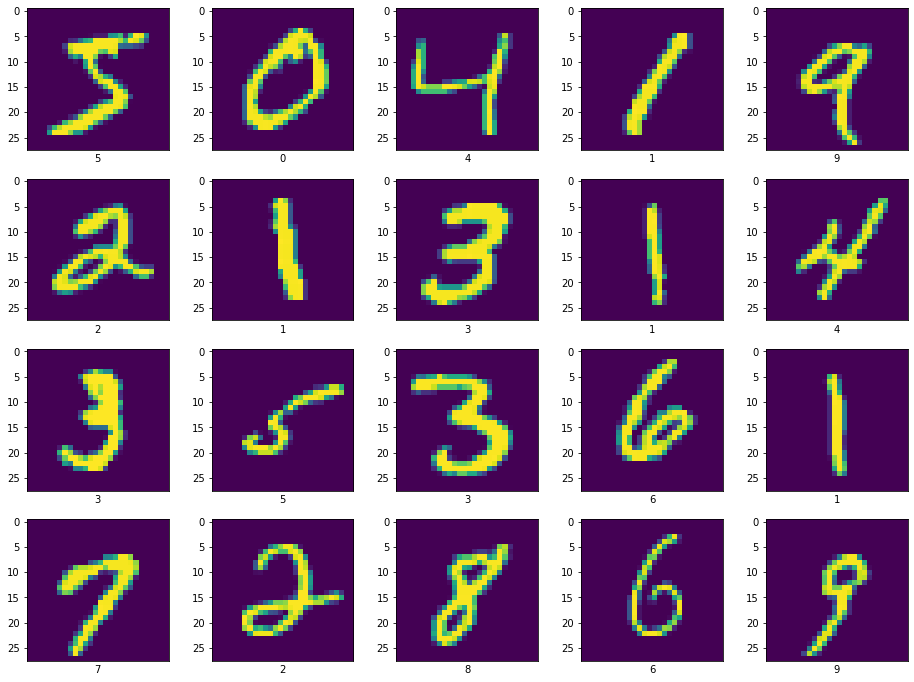

In [6]:
figure(figsize=(16,12))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.imshow(X_train_pre[i])
    plt.xlabel(y_train_pre[i])
plt.show()

### convert class vectors to binary class matrices
convert class label to one-hot coding

In [7]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)
# the first 5 samples are 5,0,4,1,9
y_train[:5,] 

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [8]:
validation_split = 0.166667
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

training data shape: (50000, 784)
50000 train samples, 10000 validation samples, 10000 test samples


## The model

### Build the model

In [9]:
#from keras.layers import Dropout

model = keras.Sequential()
model.add(layers.Dense(512, activation='relu',input_shape=(784,)))
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(10, activation='softmax',kernel_initializer='glorot_uniform'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [11]:
EPOCHS = 20

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 5s 9ms/step - loss: 0.2543 - accuracy: 0.9220 - val_loss: 0.1539 - val_accuracy: 0.9532
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0955 - accuracy: 0.9715 - val_loss: 0.0991 - val_accuracy: 0.9681
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0609 - accuracy: 0.9814 - val_loss: 0.0904 - val_accuracy: 0.9724
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.0825 - val_accuracy: 0.9753
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0752 - val_accuracy: 0.9781
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.1117 - val_accuracy: 0.9710
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0830 - val_accuracy: 0.9779
Epoch 

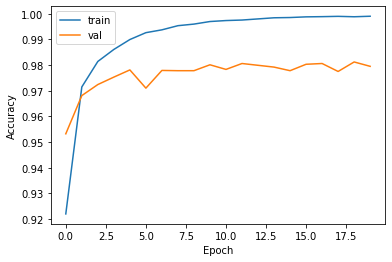

In [12]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [13]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.17%


Make predictions for testing data

In [14]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred[:5]

array([7, 2, 1, 0, 4], dtype=int64)

Visualize predictions

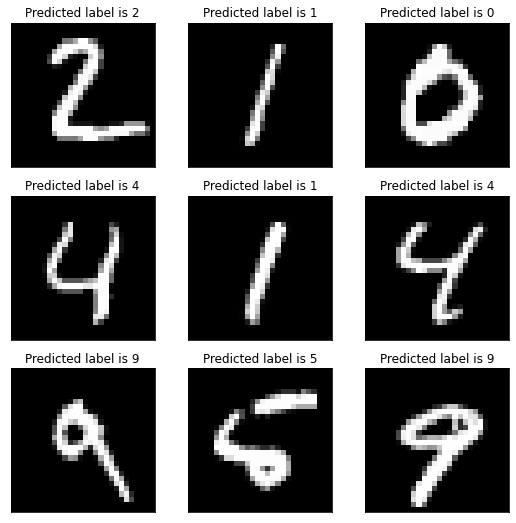

In [15]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(1, col*row +1):
    pred = y_pred[i]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

## Early Stopping

In [16]:
EPOCHS = 20

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.1421 - val_accuracy: 0.9807
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.1691 - val_accuracy: 0.9786
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.1604 - val_accuracy: 0.9799


In [17]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.17%


## Tuning Part for Homework

In [18]:
#define a function to build up models
def DPmodel(activation,layers_n,optimizer):

    model = keras.Sequential()
    for i in range(len(layers_n)):
        model.add(layers.Dense(layers_n[i], activation=activation))

    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

Epoch 1/20
391/391 [==============================] - 4s 9ms/step - loss: 0.2985 - accuracy: 0.9111 - val_loss: 0.1937 - val_accuracy: 0.9444
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 0.1415 - accuracy: 0.9573 - val_loss: 0.1455 - val_accuracy: 0.9576
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0980 - accuracy: 0.9710 - val_loss: 0.1151 - val_accuracy: 0.9664
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0729 - accuracy: 0.9782 - val_loss: 0.1018 - val_accuracy: 0.9699
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0554 - accuracy: 0.9837 - val_loss: 0.0944 - val_accuracy: 0.9717
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0419 - accuracy: 0.9876 - val_loss: 0.0852 - val_accuracy: 0.9742
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0316 - accuracy: 0.9910 - val_loss: 0.0838 - val_accuracy: 0.9758
Epoch 

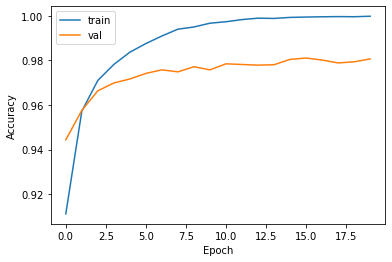

Testing set accuracy: 98.01%


In [31]:
# model2 activation = 'tanh'
activation = 'tanh'
layers_n = [512,128]
optimizer = keras.optimizers.RMSprop(0.001)
model2 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 128
history = model2.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
plot_history(history)
_, acc = model2.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
391/391 [==============================] - 3s 7ms/step - loss: 0.5617 - accuracy: 0.8537 - val_loss: 0.3082 - val_accuracy: 0.9073
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 0.2365 - accuracy: 0.9302 - val_loss: 0.2449 - val_accuracy: 0.9239
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 0.1771 - accuracy: 0.9473 - val_loss: 0.1718 - val_accuracy: 0.9481
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.1383 - accuracy: 0.9584 - val_loss: 0.1434 - val_accuracy: 0.9566
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.1104 - accuracy: 0.9673 - val_loss: 0.1175 - val_accuracy: 0.9629
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0902 - accuracy: 0.9728 - val_loss: 0.1058 - val_accuracy: 0.9664
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0748 - accuracy: 0.9774 - val_loss: 0.1031 - val_accuracy: 0.9667
Epoch 

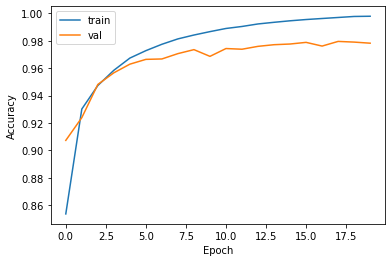

Testing set accuracy: 98.22%


In [19]:
# model3 activation = 'sigmoid'
activation = 'sigmoid'
layers_n = [512,128]
optimizer = keras.optimizers.RMSprop(0.001)
model3 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 128
history = model3.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
plot_history(history)
_, acc = model3.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
391/391 [==============================] - 4s 8ms/step - loss: 0.4531 - accuracy: 0.8615 - val_loss: 0.2770 - val_accuracy: 0.9152
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 0.1946 - accuracy: 0.9410 - val_loss: 0.1661 - val_accuracy: 0.9481
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 0.1302 - accuracy: 0.9601 - val_loss: 0.1226 - val_accuracy: 0.9614
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0973 - accuracy: 0.9708 - val_loss: 0.1070 - val_accuracy: 0.9667
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0765 - accuracy: 0.9766 - val_loss: 0.0901 - val_accuracy: 0.9719
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0621 - accuracy: 0.9812 - val_loss: 0.1105 - val_accuracy: 0.9645
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0913 - val_accuracy: 0.9720
Epoch 

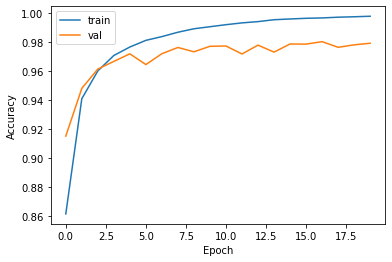

Testing set accuracy: 97.99%


In [20]:
# model4 activation = 'softplus'
activation = 'softplus'
layers_n = [512,128]
optimizer = keras.optimizers.RMSprop(0.001)
model4 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 128
history = model4.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
plot_history(history)
_, acc = model4.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
391/391 [==============================] - 4s 8ms/step - loss: 0.3075 - accuracy: 0.9069 - val_loss: 0.2212 - val_accuracy: 0.9352
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 0.1311 - accuracy: 0.9598 - val_loss: 0.1389 - val_accuracy: 0.9582
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0920 - accuracy: 0.9704 - val_loss: 0.1180 - val_accuracy: 0.9659
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0691 - accuracy: 0.9782 - val_loss: 0.1037 - val_accuracy: 0.9697
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0550 - accuracy: 0.9821 - val_loss: 0.0972 - val_accuracy: 0.9715
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.0959 - val_accuracy: 0.9722
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0368 - accuracy: 0.9875 - val_loss: 0.0853 - val_accuracy: 0.9747
Epoch 

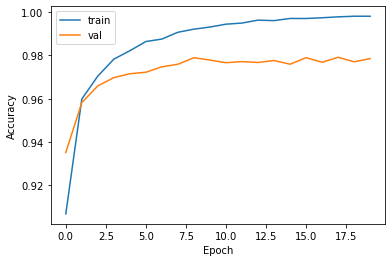

Testing set accuracy: 98.08%


In [36]:
# model5 activation = 'elu'
activation = 'elu'
layers_n = [512,128]
optimizer = keras.optimizers.RMSprop(0.001)
model5 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 128
history = model5.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
plot_history(history)
_, acc = model5.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
391/391 [==============================] - 3s 8ms/step - loss: 0.3431 - accuracy: 0.8971 - val_loss: 0.2474 - val_accuracy: 0.9276
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 0.1441 - accuracy: 0.9554 - val_loss: 0.1542 - val_accuracy: 0.9522
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 0.1005 - accuracy: 0.9692 - val_loss: 0.1594 - val_accuracy: 0.9503
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0771 - accuracy: 0.9761 - val_loss: 0.1206 - val_accuracy: 0.9641
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0612 - accuracy: 0.9809 - val_loss: 0.1025 - val_accuracy: 0.9716
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.1115 - val_accuracy: 0.9691
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0425 - accuracy: 0.9865 - val_loss: 0.1097 - val_accuracy: 0.9688
Epoch 

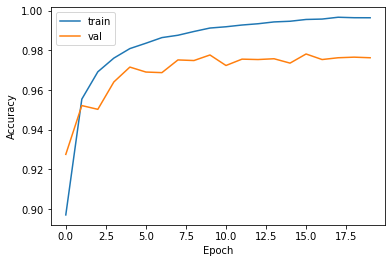

Testing set accuracy: 97.53%


In [37]:
# model6 activation = 'selu'
activation = 'selu'
layers_n = [512,128]
optimizer = keras.optimizers.RMSprop(0.001)
model6 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 128
history = model6.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
plot_history(history)
_, acc = model6.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
196/196 [==============================] - 4s 14ms/step - loss: 0.3212 - accuracy: 0.9036 - val_loss: 0.1792 - val_accuracy: 0.9451
Epoch 2/20
196/196 [==============================] - 3s 13ms/step - loss: 0.1183 - accuracy: 0.9639 - val_loss: 0.1258 - val_accuracy: 0.9617
Epoch 3/20
196/196 [==============================] - 3s 13ms/step - loss: 0.0746 - accuracy: 0.9771 - val_loss: 0.0871 - val_accuracy: 0.9738
Epoch 4/20
196/196 [==============================] - 2s 13ms/step - loss: 0.0529 - accuracy: 0.9829 - val_loss: 0.0869 - val_accuracy: 0.9736
Epoch 5/20
196/196 [==============================] - 3s 13ms/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.0792 - val_accuracy: 0.9754
Epoch 6/20
196/196 [==============================] - 2s 12ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0804 - val_accuracy: 0.9774
Epoch 7/20
196/196 [==============================] - 2s 13ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0839 - val_accuracy: 0.9768

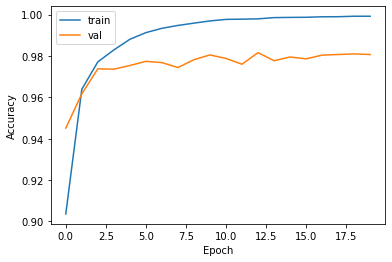

Testing set accuracy: 98.07%


In [39]:
# model7'relu' is the best performed activation function, then I try to change the batch size to 256

activation = 'relu'
layers_n = [512,128]
optimizer = keras.optimizers.RMSprop(0.001)
model7 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 256
history = model7.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
plot_history(history)
_, acc = model7.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
196/196 [==============================] - 4s 14ms/step - loss: 0.3139 - accuracy: 0.9057 - val_loss: 0.1609 - val_accuracy: 0.9517
Epoch 2/20
196/196 [==============================] - 3s 13ms/step - loss: 0.1142 - accuracy: 0.9652 - val_loss: 0.2219 - val_accuracy: 0.9267
Epoch 3/20
196/196 [==============================] - 3s 13ms/step - loss: 0.0726 - accuracy: 0.9774 - val_loss: 0.0892 - val_accuracy: 0.9721
Epoch 4/20
196/196 [==============================] - 3s 13ms/step - loss: 0.0516 - accuracy: 0.9832 - val_loss: 0.0929 - val_accuracy: 0.9708
Epoch 5/20
196/196 [==============================] - 2s 12ms/step - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0870 - val_accuracy: 0.9752
Epoch 6/20
196/196 [==============================] - 3s 13ms/step - loss: 0.0267 - accuracy: 0.9919 - val_loss: 0.1370 - val_accuracy: 0.9608
Epoch 7/20
196/196 [==============================] - 3s 13ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0798 - val_accuracy: 0.9791

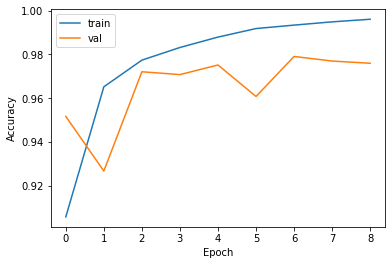

Testing set accuracy: 97.80%


In [42]:
# model8 higher batch size make it earlier to converge, so we use early stop
activation = 'relu'
layers_n = [512,128]
optimizer = keras.optimizers.RMSprop(0.001)
model8 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 256
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


history = model8.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])
plot_history(history)
_, acc = model8.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/10
196/196 [==============================] - 2s 9ms/step - loss: 0.3156 - accuracy: 0.9034 - val_loss: 0.1852 - val_accuracy: 0.9445
Epoch 2/10
196/196 [==============================] - 2s 8ms/step - loss: 0.1174 - accuracy: 0.9651 - val_loss: 0.1182 - val_accuracy: 0.9634
Epoch 3/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0748 - accuracy: 0.9767 - val_loss: 0.1082 - val_accuracy: 0.9667
Epoch 4/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0883 - val_accuracy: 0.9731
Epoch 5/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.1222 - val_accuracy: 0.9628
Epoch 6/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0752 - val_accuracy: 0.9787
Epoch 7/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0872 - val_accuracy: 0.9747
Epoch 

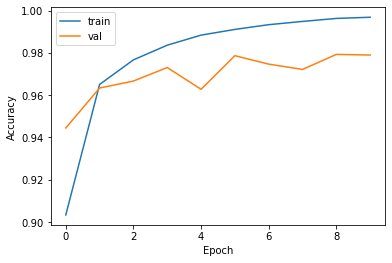

Testing set accuracy: 98.03%


In [43]:
# model9 or use the highest point of val_accuracy during the epoch interations 
activation = 'relu'
layers_n = [512,128]
optimizer = keras.optimizers.RMSprop(0.001)
model9 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 10
batch_size = 256


history = model9.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    )
plot_history(history)
_, acc = model9.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
391/391 [==============================] - 2s 4ms/step - loss: 2.2183 - accuracy: 0.2569 - val_loss: 2.0620 - val_accuracy: 0.4612
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 1.9152 - accuracy: 0.5719 - val_loss: 1.7650 - val_accuracy: 0.6384
Epoch 3/20
391/391 [==============================] - 2s 4ms/step - loss: 1.6102 - accuracy: 0.6841 - val_loss: 1.4624 - val_accuracy: 0.7196
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 1.3272 - accuracy: 0.7457 - val_loss: 1.2064 - val_accuracy: 0.7692
Epoch 5/20
391/391 [==============================] - 2s 4ms/step - loss: 1.1026 - accuracy: 0.7850 - val_loss: 1.0141 - val_accuracy: 0.7977
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 0.9380 - accuracy: 0.8090 - val_loss: 0.8752 - val_accuracy: 0.8196
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.8194 - accuracy: 0.8272 - val_loss: 0.7750 - val_accuracy: 0.8318
Epoch 

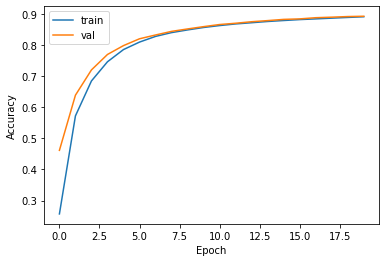

Testing set accuracy: 89.76%


In [47]:
# model10 change the optimizer = keras.optimizers.SGD(0.001)
activation = 'relu'
layers_n = [512,128]
optimizer = keras.optimizers.SGD(0.001)
model10 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 128


history = model10.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    )
plot_history(history)
_, acc = model10.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 1.1392 - accuracy: 0.7371 - val_loss: 0.5869 - val_accuracy: 0.8617
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.4766 - accuracy: 0.8780 - val_loss: 0.4102 - val_accuracy: 0.8936
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3745 - accuracy: 0.8975 - val_loss: 0.3521 - val_accuracy: 0.9058
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3303 - accuracy: 0.9072 - val_loss: 0.3178 - val_accuracy: 0.9144
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3028 - accuracy: 0.9136 - val_loss: 0.2976 - val_accuracy: 0.9192
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2830 - accuracy: 0.9196 - val_loss: 0.2796 - val_accuracy: 0.9232
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2669 - accuracy: 0.9239 - val_loss: 0.2671 - val_accuracy: 0.9262
Epoch 

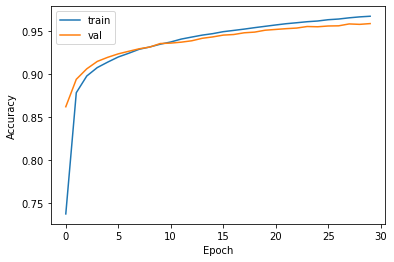

Testing set accuracy: 96.05%


In [58]:
# model11 change the learning rate, optimizer = keras.optimizers.SGD(0.005)
activation = 'relu'
layers_n = [512,128]
optimizer = keras.optimizers.SGD(0.01)
model11 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 30
batch_size = 128


history = model11.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    )
plot_history(history)
_, acc = model11.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

# even use higher learning rate, SGD took too much time to converge, also can not find out the global optimal point

In [64]:
# model12 change the optimizer = keras.optimizers.Adam(0.001) 
activation = 'relu'
layers_n = [512,128]
optimizer = keras.optimizers.Adam(0.001)
model12 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 128


history = model12.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    )
_, acc = model12.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
391/391 [==============================] - 2s 5ms/step - loss: 0.2601 - accuracy: 0.9249 - val_loss: 0.1544 - val_accuracy: 0.9542
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0956 - accuracy: 0.9709 - val_loss: 0.0905 - val_accuracy: 0.9734
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0616 - accuracy: 0.9811 - val_loss: 0.0853 - val_accuracy: 0.9727
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0843 - val_accuracy: 0.9737
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0812 - val_accuracy: 0.9764
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0807 - val_accuracy: 0.9777
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0926 - val_accuracy: 0.9738
Epoch 

In [66]:
# model13 change the learning rate of optimizer = keras.optimizers.Adam(0.01) 
activation = 'relu'
layers_n = [512,128]
optimizer = keras.optimizers.Adam(0.01)
model13 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 128


history = model13.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    )
_, acc = model13.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))
# learning rate is too large

Epoch 1/20
391/391 [==============================] - 2s 5ms/step - loss: 0.2439 - accuracy: 0.9274 - val_loss: 0.1515 - val_accuracy: 0.9520
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 0.1265 - accuracy: 0.9619 - val_loss: 0.1296 - val_accuracy: 0.9627
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0969 - accuracy: 0.9716 - val_loss: 0.1344 - val_accuracy: 0.9651
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0939 - accuracy: 0.9726 - val_loss: 0.1508 - val_accuracy: 0.9617
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0797 - accuracy: 0.9768 - val_loss: 0.1371 - val_accuracy: 0.9682
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0749 - accuracy: 0.9789 - val_loss: 0.1357 - val_accuracy: 0.9668
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0737 - accuracy: 0.9804 - val_loss: 0.1714 - val_accuracy: 0.9627
Epoch 

In [68]:
# model14 change the learning rate of optimizer = keras.optimizers.Adam(0.0001) 
activation = 'relu'
layers_n = [512,128]
optimizer = keras.optimizers.Adam(0.01)
model14 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 60
batch_size = 128


history = model14.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    )
_, acc = model14.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))
# learning rate is too small, also it will stuck in some little cave, so the result is worse

Epoch 1/60
391/391 [==============================] - 2s 5ms/step - loss: 0.2445 - accuracy: 0.9248 - val_loss: 0.2075 - val_accuracy: 0.9362
Epoch 2/60
391/391 [==============================] - 2s 5ms/step - loss: 0.1247 - accuracy: 0.9631 - val_loss: 0.1207 - val_accuracy: 0.9666
Epoch 3/60
391/391 [==============================] - 2s 5ms/step - loss: 0.1009 - accuracy: 0.9703 - val_loss: 0.1277 - val_accuracy: 0.9641
Epoch 4/60
391/391 [==============================] - 2s 5ms/step - loss: 0.0883 - accuracy: 0.9740 - val_loss: 0.1311 - val_accuracy: 0.9685
Epoch 5/60
391/391 [==============================] - 2s 5ms/step - loss: 0.0734 - accuracy: 0.9788 - val_loss: 0.1266 - val_accuracy: 0.9694
Epoch 6/60
391/391 [==============================] - 2s 5ms/step - loss: 0.0725 - accuracy: 0.9794 - val_loss: 0.1422 - val_accuracy: 0.9655
Epoch 7/60
391/391 [==============================] - 2s 5ms/step - loss: 0.0686 - accuracy: 0.9811 - val_loss: 0.1513 - val_accuracy: 0.9679
Epoch 

In [71]:
# model15 change number of layers
activation = 'relu'
layers_n = [512, 256, 128, 64]
optimizer = keras.optimizers.Adam(0.001)
model15 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 128


history = model15.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    )
_, acc = model15.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 0.2616 - accuracy: 0.9230 - val_loss: 0.1283 - val_accuracy: 0.9614
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0930 - accuracy: 0.9720 - val_loss: 0.0898 - val_accuracy: 0.9713
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0609 - accuracy: 0.9805 - val_loss: 0.0952 - val_accuracy: 0.9728
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0417 - accuracy: 0.9871 - val_loss: 0.0947 - val_accuracy: 0.9720
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0371 - accuracy: 0.9880 - val_loss: 0.0754 - val_accuracy: 0.9786
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0284 - accuracy: 0.9902 - val_loss: 0.1205 - val_accuracy: 0.9704
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0267 - accuracy: 0.9911 - val_loss: 0.0902 - val_accuracy: 0.9757
Epoch 

In [72]:
# model16 change number of layers and number of neurons to [64, 32, 16]
activation = 'relu'
layers_n = [64, 32, 16]
optimizer = keras.optimizers.Adam(0.001)
model16 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 128


history = model16.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    )
_, acc = model16.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
391/391 [==============================] - 1s 2ms/step - loss: 0.4714 - accuracy: 0.8646 - val_loss: 0.2140 - val_accuracy: 0.9421
Epoch 2/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1768 - accuracy: 0.9481 - val_loss: 0.1586 - val_accuracy: 0.9540
Epoch 3/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1295 - accuracy: 0.9621 - val_loss: 0.1431 - val_accuracy: 0.9582
Epoch 4/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1066 - accuracy: 0.9686 - val_loss: 0.1287 - val_accuracy: 0.9611
Epoch 5/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9735 - val_loss: 0.1155 - val_accuracy: 0.9657
Epoch 6/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9767 - val_loss: 0.1084 - val_accuracy: 0.9674
Epoch 7/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9793 - val_loss: 0.1046 - val_accuracy: 0.9676
Epoch 

In [73]:
# model17 change number of layers and number of neurons to [16, 16, 16]
activation = 'relu'
layers_n = [16, 16, 16]
optimizer = keras.optimizers.Adam(0.001)
model16 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 128


history = model16.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    )
_, acc = model16.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
391/391 [==============================] - 1s 2ms/step - loss: 0.8234 - accuracy: 0.7514 - val_loss: 0.3686 - val_accuracy: 0.8948
Epoch 2/20
391/391 [==============================] - 1s 2ms/step - loss: 0.3069 - accuracy: 0.9116 - val_loss: 0.2815 - val_accuracy: 0.9207
Epoch 3/20
391/391 [==============================] - 1s 2ms/step - loss: 0.2461 - accuracy: 0.9292 - val_loss: 0.2398 - val_accuracy: 0.9315
Epoch 4/20
391/391 [==============================] - 1s 2ms/step - loss: 0.2131 - accuracy: 0.9377 - val_loss: 0.2254 - val_accuracy: 0.9346
Epoch 5/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1914 - accuracy: 0.9439 - val_loss: 0.2060 - val_accuracy: 0.9408
Epoch 6/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1771 - accuracy: 0.9488 - val_loss: 0.2035 - val_accuracy: 0.9396
Epoch 7/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1663 - accuracy: 0.9501 - val_loss: 0.1902 - val_accuracy: 0.9458
Epoch 

In [80]:
# changge the validation size
input_dim = 784 # 28*28
X_train = X_train_pre.reshape(X_train_pre.shape[0], input_dim) 
X_test = X_test_pre.reshape(X_test_pre.shape[0], input_dim) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255. 
X_test /= 255.
print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)


training data shape: (60000, 784)
60000 train samples, 10000 test samples


In [81]:
validation_split = 0.1
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

training data shape: (54000, 784)
54000 train samples, 6000 validation samples, 10000 test samples


In [25]:
# model18 change patience of early stop,and use more data to train
activation = 'relu'
layers_n = [512, 128]
optimizer = keras.optimizers.Adam(0.001)
model18 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 128

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


history = model18.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])
_, acc = model18.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
391/391 [==============================] - 2s 5ms/step - loss: 0.2587 - accuracy: 0.9243 - val_loss: 0.1333 - val_accuracy: 0.9604
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0965 - accuracy: 0.9709 - val_loss: 0.0944 - val_accuracy: 0.9713
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.0831 - val_accuracy: 0.9738
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0414 - accuracy: 0.9870 - val_loss: 0.0797 - val_accuracy: 0.9754
Epoch 5/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.0789 - val_accuracy: 0.9754
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0709 - val_accuracy: 0.9777
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.9933 - val_loss: 0.0746 - val_accuracy: 0.9777
Epoch 

In [45]:
# model19  high batchsize and epochs
activation = 'relu'
layers_n = [1024, 256, 64]
optimizer = keras.optimizers.Adam(0.001)
model19 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 1024

early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)


history = model19.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])
_, acc = model19.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
49/49 [==============================] - 2s 37ms/step - loss: 0.4695 - accuracy: 0.8661 - val_loss: 0.1900 - val_accuracy: 0.9455
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1433 - accuracy: 0.9588 - val_loss: 0.1229 - val_accuracy: 0.9640
Epoch 3/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0916 - accuracy: 0.9731 - val_loss: 0.0960 - val_accuracy: 0.9723
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0603 - accuracy: 0.9823 - val_loss: 0.0890 - val_accuracy: 0.9725
Epoch 5/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0488 - accuracy: 0.9854 - val_loss: 0.0722 - val_accuracy: 0.9774
Epoch 6/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0287 - accuracy: 0.9920 - val_loss: 0.0670 - val_accuracy: 0.9796
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0203 - accuracy: 0.9942 - val_loss: 0.0671 - val_accuracy: 0.9800
Epoch 8/20
49

In [29]:
# model20 very small learning rate, high batchsize and epochs
activation = 'relu'
layers_n = [1024, 256, 64]
optimizer = keras.optimizers.RMSprop(0.001)
model20 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 20
batch_size = 1024

# early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)


history = model20.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
                    # callbacks=[early_stop])
_, acc = model20.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/20
49/49 [==============================] - 2s 34ms/step - loss: 0.6590 - accuracy: 0.7984 - val_loss: 0.3382 - val_accuracy: 0.8928
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2275 - accuracy: 0.9317 - val_loss: 0.1983 - val_accuracy: 0.9360
Epoch 3/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1504 - accuracy: 0.9537 - val_loss: 0.1308 - val_accuracy: 0.9590
Epoch 4/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1080 - accuracy: 0.9660 - val_loss: 0.0907 - val_accuracy: 0.9719
Epoch 5/20
49/49 [==============================] - 2s 32ms/step - loss: 0.0754 - accuracy: 0.9769 - val_loss: 0.0794 - val_accuracy: 0.9746
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.0600 - accuracy: 0.9815 - val_loss: 0.1693 - val_accuracy: 0.9486
Epoch 7/20
49/49 [==============================] - 2s 32ms/step - loss: 0.0513 - accuracy: 0.9846 - val_loss: 0.0700 - val_accuracy: 0.9786
Epoch 8/20
49

In [38]:
# model21 maybe the learning rate is too large
activation = 'relu'
layers_n = [1024, 256, 64]
optimizer = keras.optimizers.RMSprop(0.0001)
model21 = DPmodel(activation,layers_n,optimizer)
EPOCHS = 40
batch_size = 1024

# early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)


history = model21.fit(X_train, y_train,
                    batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
                    # callbacks=[early_stop])
_, acc = model21.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/40
49/49 [==============================] - 2s 35ms/step - loss: 1.1454 - accuracy: 0.7692 - val_loss: 0.5403 - val_accuracy: 0.8794
Epoch 2/40
49/49 [==============================] - 2s 32ms/step - loss: 0.3976 - accuracy: 0.9019 - val_loss: 0.3302 - val_accuracy: 0.9126
Epoch 3/40
49/49 [==============================] - 2s 32ms/step - loss: 0.2819 - accuracy: 0.9235 - val_loss: 0.2653 - val_accuracy: 0.9260
Epoch 4/40
49/49 [==============================] - 2s 32ms/step - loss: 0.2334 - accuracy: 0.9352 - val_loss: 0.2377 - val_accuracy: 0.9338
Epoch 5/40
49/49 [==============================] - 2s 32ms/step - loss: 0.2028 - accuracy: 0.9436 - val_loss: 0.2208 - val_accuracy: 0.9371
Epoch 6/40
49/49 [==============================] - 2s 32ms/step - loss: 0.1793 - accuracy: 0.9494 - val_loss: 0.1934 - val_accuracy: 0.9441
Epoch 7/40
49/49 [==============================] - 2s 32ms/step - loss: 0.1610 - accuracy: 0.9548 - val_loss: 0.1744 - val_accuracy: 0.9489
Epoch 8/40
49

## learned: for image classification, relu is the best activation function in most situation, and softmax is necessary for a multi-classification problem as the activation function in the output layer. Find out the suitable optimiziter and then learning rate should be one of the prior thing for fine tuning. A larger batch size will lead to an earlier converge